In [1]:
import jsonpickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open("results_50_2021-04-26.json", "r") as file:
    contents = file.read()
    unfrozen = jsonpickle.decode(contents)

df = pd.DataFrame(unfrozen)
cols = list(df.columns)

In [19]:
df

# for item in unfrozen:
#     item["weights"] = tuple(item["weights"])


# with open(f"new_results_3000_2021-04-26.json", "w") as file:
#     frozen = jsonpickle.encode(unfrozen)
#     file.write(frozen)



# df.value_counts(["array", "weights"])
# df["array"]

# test = (0, 3, 4, 6, 1, 2, 5, 8, 7)
# output = df['array'] == test
# df[output]

# errors: 15975 - 15999
    


,array,weights,expanded_nodes,time_elapsed,depth
0,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(1.0, 0.0)",6897,2.854512,27
1,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.98, 0.02)",7302,3.253514,27
2,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.96, 0.04)",7296,3.148510,27
3,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.94, 0.06)",7300,3.007513,27
4,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.9199999999999999, 0.08)",7304,3.120513,27
5,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.8999999999999999, 0.1)",7461,3.187513,27
6,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.8799999999999999, 0.12)",7992,3.564512,27
7,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.8599999999999999, 0.14)",8335,3.614513,27
8,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.8399999999999999, 0.16)",8982,4.970000,27
9,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(0.8199999999999998, 0.18)",9664,5.590998,27


## Group items
Group items by depth (= how many steps were required to finish the puzzle), show the distribution of depths as chart

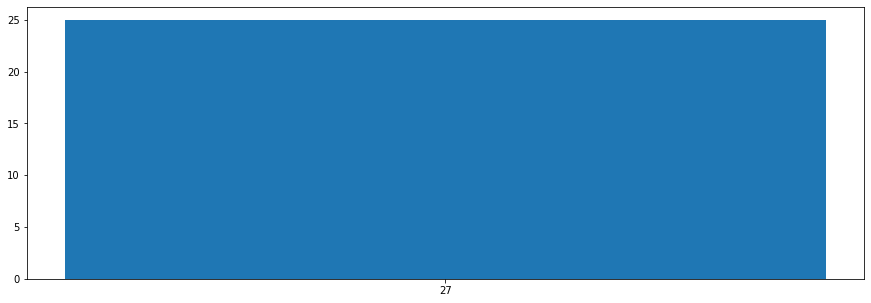

In [3]:
group = df.groupby(['depth'])
x_pos = [i for i, _ in enumerate(group)]
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(list(group.groups.keys()))
ax.bar(list(group.groups.keys()), list(group.size()))
plt.show()

## Printing a single constellation

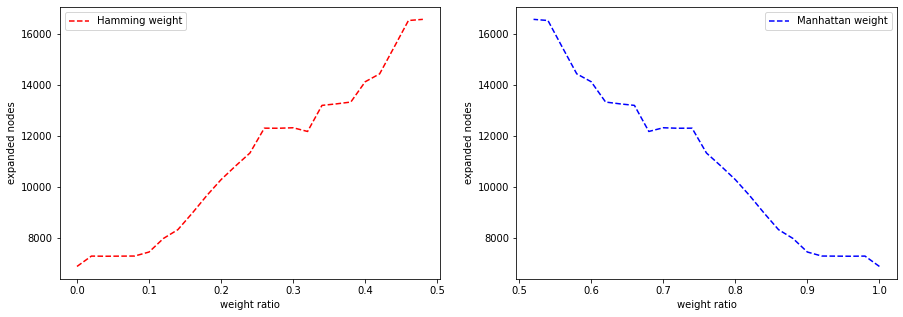

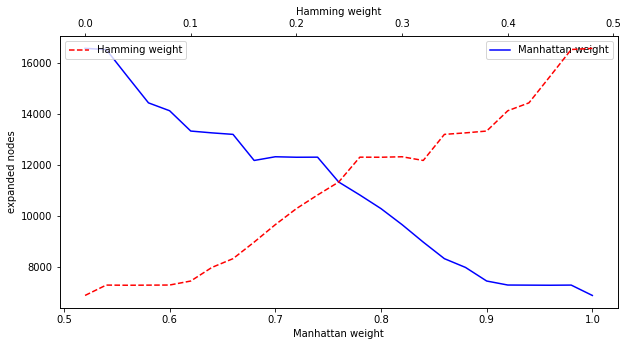

In [4]:
x1 = np.array(df[0:25]['weights'].tolist())[:,0]
y = df[0:25]['expanded_nodes']
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].plot(x1,y, "b--", label="Manhattan weight")
ax[1].set_xlabel("weight ratio")
ax[1].set_ylabel("expanded nodes")
ax[1].legend()

x2 = np.array(df[0:25]['weights'].tolist())[:,1]
y = df[0:25]['expanded_nodes']
ax[0].plot(x2,y, "r--", label="Hamming weight")
ax[0].set_xlabel("weight ratio")
ax[0].set_ylabel("expanded nodes")
ax[0].legend()

plt.show()

############## COMBINED

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twiny()

ax1.plot(x1,y, "b", label="Manhattan weight")
ax1.set_xlabel("Manhattan weight")
ax1.set_ylabel("expanded nodes")
ax1.legend()

ax2.plot(x2,y, "r--", label="Hamming weight")
ax2.set_xlabel("Hamming weight")
ax2.set_ylabel("expanded nodes")
ax2.legend()

plt.show()


## Print constellation for all (average)

Shows the average expanded nodes based on the weight

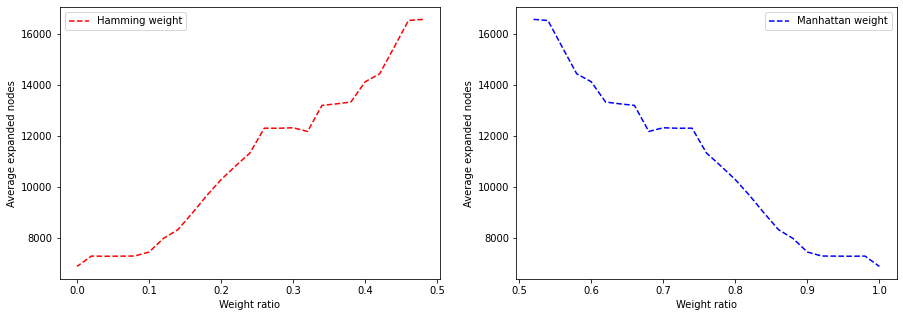

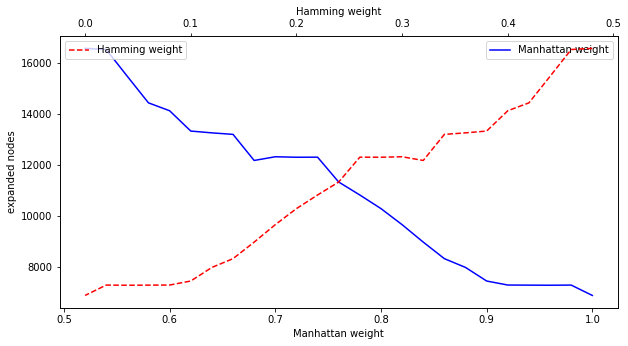

In [5]:
weight_group = df.groupby(['weights'])
x1 = np.array(list(weight_group.groups.keys()))[:,0]
x2 = np.array(list(weight_group.groups.keys()))[:,1]
y = weight_group['expanded_nodes'].mean()

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].plot(x1, y, "b--", label="Manhattan weight") 
ax[1].set_xlabel("Weight ratio")
ax[1].set_ylabel("Average expanded nodes")
ax[1].legend()

ax[0].plot(x2, y, "r--",label = "Hamming weight") 
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()
plt.show()

###################### COMBINED

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twiny()

ax1.plot(x1,y, "b", label="Manhattan weight")
ax1.set_xlabel("Manhattan weight")
ax1.set_ylabel("expanded nodes")
ax1.legend()

ax2.plot(x2,y, "r--", label="Hamming weight")
ax2.set_xlabel("Hamming weight")
ax2.set_ylabel("expanded nodes")
ax2.legend()

plt.show()


In [6]:
df = pd.DataFrame(unfrozen)

## Min Nodes

In [7]:
min_value = group[['expanded_nodes']].min()
min_value

,expanded_nodes
depth,
27,6897


## Max Nodes

In [8]:
min_value = group[['expanded_nodes']].max()
min_value

,expanded_nodes
depth,
27,16557


## Mean Nodes

In [9]:
mean_value = group[['expanded_nodes']].mean()
print(mean_value)

       expanded_nodes
depth                
27           11076.92


## Best weights based on the least nodes per depth

In [10]:
min_nodes = df.loc[group['expanded_nodes'].idxmin()]
np.mean(min_nodes['weights'].tolist(), axis=0)

array([1., 0.])

## Best weights based on the weights with the least nodes of each example

In [11]:
group_by_example = df.groupby('array')
min_nodes_per_example = df.loc[group_by_example['expanded_nodes'].idxmin()]
np.mean(min_nodes_per_example['weights'].tolist(), axis=0)

array([1., 0.])

In [12]:
min_nodes_per_example.sort_values("depth")

,array,weights,expanded_nodes,time_elapsed,depth
0,"(7, 5, 6, 0, 4, 2, 8, 1, 3)","(1.0, 0.0)",6897,2.854512,27


[1.]
weights
(1.0, 0.0)    255.444444
Name: normalized_expanded_nodes, dtype: float64


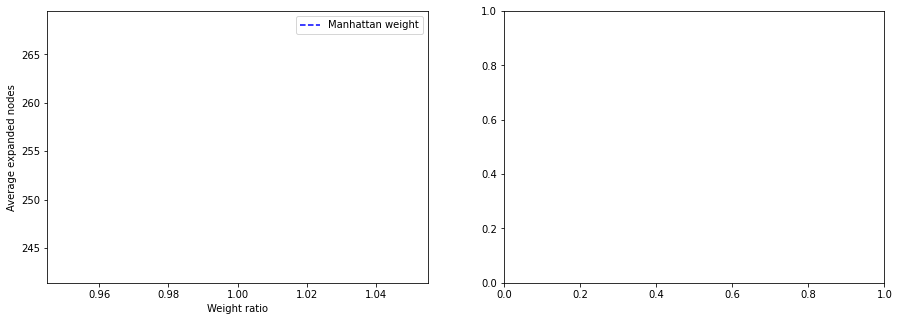

In [13]:
min_nodes_per_example['normalized_expanded_nodes'] = min_nodes_per_example['expanded_nodes'] / min_nodes_per_example['depth']
weight_group = min_nodes_per_example.groupby(['weights'])

x1 = np.array(list(weight_group.groups.keys()))[:,0]
x2 = np.array(list(weight_group.groups.keys()))[:,1]
weight_group['normalized_expanded_nodes']
y = weight_group['normalized_expanded_nodes'].mean()

print(x1)
print(y)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x1, y, "b--", label="Manhattan weight") 
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()

# ax[1].plot(x2, y, "r--",label = "Hamming weight") 
# ax[1].set_xlabel("Weight ratio")
# ax[1].set_ylabel("Average expanded nodes")
# ax[1].legend()
plt.show()

# ###################### COMBINED

# fig = plt.figure(figsize=(10,5))
# ax1 = fig.add_subplot()
# ax2 = ax1.twiny()

# ax1.plot(x1,y, "b", label="Manhattan weight")
# ax1.set_xlabel("Manhattan weight")
# ax1.set_ylabel("expanded nodes")
# ax1.legend()

# ax2.plot(x2,y, "r--", label="Hamming weight")
# ax2.set_xlabel("Hamming weight")
# ax2.set_ylabel("expanded nodes")
# ax2.legend()

# plt.show()
